# Finance Time Series Îç∞Ïù¥ÌÑ∞ ÌôúÏö©ÌïòÍ∏∞
> Í∞úÎÖê Ï†ïÎ¶¨Îäî Ìï¥Îãπ ÎßÅÌÅ¨Î•º Ï∞∏Í≥†Ìï¥Ï£ºÏÑ∏Ïöî! ‚û°Ô∏è [velog.io/@dlgkdis801/Node 10. Finance Time Series Îç∞Ïù¥ÌÑ∞ ÌôúÏö©ÌïòÍ∏∞](https://velog.io/@dlgkdis801/Node-10.-Finance-Time-Series-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0)
- 3Í∞ÄÏßÄ ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ
  - Data Labeling
  - Feature Engineering
  - Model Training



In [12]:
!mkdir -p ~/aiffel/fnguide/data
!cp -r ~/data/* ~/aiffel/fnguide/data

<br>

## 1Ô∏è‚É£ Data Labeling

- 4Í∞ÄÏßÄ Ïã§Ïäµ
  - Price Change Direction
  - Using Moving Average
  - Local Min-Max
  - Trend Scanning

### ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & ÏãúÍ∞ÅÌôî

<AxesSubplot:xlabel='time'>

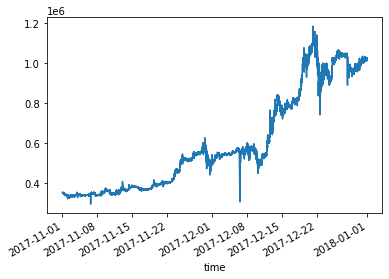

In [22]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
DATA_PATH = '/aiffel/aiffel/fnguide/data/'

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

<br>

### Price Change Direction
- window Íµ¨Í∞Ñ ÏÑ§Ï†ï
- momentum_signal : ÌòÑÏû¨ Í∞ÄÍ≤© Î∞è ÌäπÏ†ï ÏòÅÏóÖÏùº Ïù¥Ï†Ñ Í∞ÄÍ≤© Ï∞®Ïù¥Î°ú ÎùºÎ≤®ÎßÅ
- Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïù∏ `modify_data`ÏôÄ `momentum_signal` ÎπÑÍµê

In [23]:
# window ÏßÄÏ†ï
window = 10

# momentum_signal ÎßåÎì§Í∏∞
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)

# s_momentum_signal ÎßåÎì§Í∏∞
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

- Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ `modify_data`ÏóêÏÑú close(Ï¢ÖÍ∞Ä) Í∞ÄÏ†∏Ïò§Í∏∞
  - 2017-11-21Î∂ÄÌÑ∞ close(Ï¢ÖÍ∞Ä)ÍπåÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
  - 2017-11-21Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞

- `s_momentum_signal` Ï¢ÖÍ∞ÄÏôÄ ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
  - momentum_signal Í∞íÏù¥ 1Ïù¥Î©¥ red, ÏïÑÎãàÎ©¥ blue

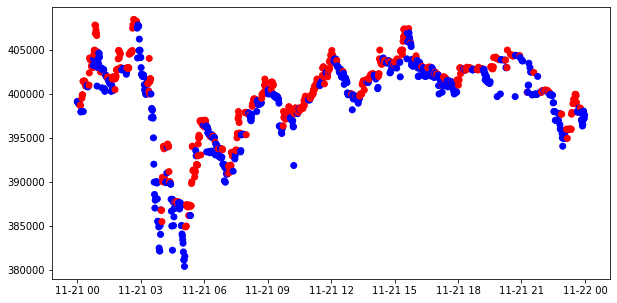

In [24]:
# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(10, 5))
plt.scatter(sub_data.index, sub_data.values, c=c_sig['color'])
plt.show()

<br>

### Using Moving Average
- Ïù¥ÎèôÌèâÍ∑†ÏÑ† Ïù¥Ïö©
- ÌòÑÏû¨ Ï£ºÍ∞ÄÍ∞Ä ÌäπÏ†ï Ïù¥ÎèôÌèâÍ∑†ÏÑ† ÏúÑ or ÏïÑÎûò ÏúÑÏπò Ïó¨Î∂ÄÏóê Îî∞Îùº ÎùºÎ≤®ÎßÅ
- lag(ÏßÄÏó∞) Î∞úÏÉù

In [25]:
# momentum_signal
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)

# s_momentum_signal
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

- ÏãúÍ∞ÅÌôî
  - Price Change Direction Î∞©ÏãùÏ≤òÎüº ÌïòÎ©¥ Îê®

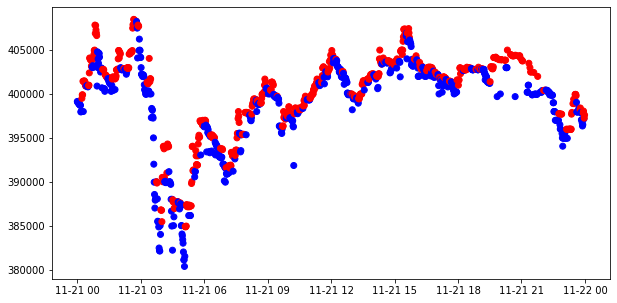

In [26]:
# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(10, 5))
plt.scatter(sub_data.index, sub_data.values, c=c_sig['color'])
plt.show()

<br>

### Local Min-Max
- Íµ≠ÏßÄÏ†Å ÏµúÏÜå, ÏµúÎåìÍ∞íÏùÑ Í≥ÑÏÜç Í∞±Ïã†ÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏµúÏÜå-ÏµúÎåÄ Íµ¨Í∞ÑÏùÑ Ïù¥Ïñ¥ ÎùºÎ≤®ÎßÅ
  - ÌòÑÏû¨ ÏïåÍ≥†Î¶¨Ï¶ò) ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏµúÏÜå, ÏµúÎåìÍ∞íÏùÑ Í∞±Ïã† -> ÏÉÅÎåÄÎ∞© Í∞íÏúºÎ°ú Ï¥àÍ∏∞Ìôî
  - ex.ÌïòÎùΩ Íµ¨Í∞ÑÏúºÎ°ú Ïù∏Ìï¥ ÏµúÏÜüÍ∞íÏùò Í∞±Ïã†Ïù¥ Ïù¥Î§ÑÏßÄÍ≥† ÏûàÎäî ÏÉÅÌô©
    - ÏµúÏÜüÍ∞í Í∞±Ïã†Ïóê Ïù¥Ïñ¥ Îã§Ïùå Í∞ÄÍ≤©Ïóê ÏÉÅÏäπÏù¥ ÏãúÏûëÎêòÎ©¥ -> ÌïòÎùΩÍµ¨Í∞Ñ Ï¢ÖÎ£åÏôÄ Ìï®Íªò ÏµúÏÜüÍ∞í Í∞±Ïã† Ï§ëÎã® -> Ïù¥Ï†Ñ ÏµúÎåÄÍ∞íÏùÑ ÌòÑÏû¨ ÏµúÏÜüÍ∞íÏúºÎ°ú Î≥ÄÍ≤Ω -> ÏÉÅÏäπÍµ¨Í∞ÑÏóêÏÑú ÏµúÎåìÍ∞í Í∞±Ïã†Ïù¥ ÎêòÎèÑÎ°ù Ï°∞Ï†ï!
  - Î∞îÎ°ú ÌïòÎùΩ Íµ¨Í∞Ñ Ï¢ÖÎ£åÎ•º ÌïòÎ©¥ ÎÑàÎ¨¥ ÏûêÏ£º ÎùºÎ≤®ÎßÅ Î≥ÄÌôîÍ∞Ä ÏùºÏñ¥ÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê, Wait Í≥ÑÏàòÎ•º ÌÜµÌï¥ Ï°∞Ï†à
- ÏàúÏ∞®Ï†ÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞Ä ‚û°Ô∏è ÏÑ†ÌòïÏ†Å Ïó∞ÏÇ∞ ÏãúÍ∞Ñ Ï¶ùÍ∞Ä(Îã®Ï†ê)
- Wait Í≥ÑÏàòÍ∞Ä ÎÑàÎ¨¥ ÏûëÏùÑ Í≤ΩÏö∞, Î≥ÄÎèôÏÑ±Ïù¥ Ïª§ÏßÄÎãà Ïûò ÏÑ†ÌÉùÌï¥Ïïº Ìï®

- ÏäàÎèÑ ÏΩîÎìú
```
ùêºùëõùëñùë°ùëñùëéùëôùëñùëßùëí ùë£ùëéùëüùëñùëéùëèùëôùëíùë†ùëìùëúùëü ùëñ ùëñùëõ ùëëùëéùë°ùëéùë†ùëíùë°:
    ùëñùëì ùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí<ùëùùëüùëíùë£ùëñùëúùë¢ùë†ùëöùëñùëõùëùùëüùëñùëêùëí
        ùëöùëñùëõùëùùëüùëñùëêùëí‚Üêùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí
        ùëùùëéùë†ùë†ùëñùëõùëî ùë°‚Ñéùëüùëúùë¢ùëî‚Ñé ùë°‚Ñéùëí ùêπùëéùëôùëôùëñùëõùëî ùëáùëüùëíùëõùëë
        ùëéùëêùëêùë¢ùëöùë¢ùëôùëéùë°ùëíùë†ùëöùëñùëõùëùùëüùëñùëêùëí
    ùëñùëì ùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí>ùëùùëüùëíùë£ùëñùëúùë¢ùë†ùëöùëéùë•ùëùùëüùëñùëêùëí
        ùëöùëéùë•ùëùùëüùëñùëêùëí‚Üêùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí
        ùëùùëéùë†ùë†ùëñùëõùëî ùë°‚Ñéùëüùëúùë¢ùëî‚Ñé ùë°‚Ñéùëí ùëÖùëñùë†ùëñùëõùëî ùëáùëüùëíùëõùëë
        ùëéùëêùëêùë¢ùëöùë¢ùëôùëéùë°ùëíùë†ùëöùëéùë•ùëùùëüùëñùëêùëí
    ùëñùëì ùëíùëõùëëùë† ùë°‚Ñéùëí ùêπùëéùëôùëôùëñùëõùëî ùëáùëüùëíùëõùëë
        ùëöùëéùë•ùëùùëüùëñùëêùëí‚Üêùëöùëñùëõùëùùëüùëñùëêùëí
    ùëñùëì ùëíùëõùëëùë† ùë°‚Ñéùëí ùëÖùëñùë†ùëñùëõùëî ùëáùëüùëíùëõùëë
        ùëöùëñùëõùëùùëüùëñùëêùëí‚Üêùëöùëéùë•ùëùùëüùëñùëêùëí
```

- [1] Ï¥àÍ∏∞ ÏµúÎåÄÍ∞íÏùÑ Ï¢ÖÍ∞Ä Ï≤´ Î≤àÏß∏ Í∞íÏúºÎ°ú ÏÑ§Ï†ï
- [2] Í∏∞Ï°¥ ÏµúÎåìÍ∞íÎ≥¥Îã§ Í∞íÏù¥ ÌÅ¨Îã§Î©¥ -> max_value Í∞±Ïã†
- [3] ÏµúÎåìÍ∞íÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
- [4] ÏµúÎåìÍ∞í Í∞±Ïã† ÌîåÎûòÍ∑∏
- [5] ÏµúÏÜüÍ∞í ÎØ∏Í∞±Ïã† Ïãú, ÏµúÎåìÍ∞í Í∞±Ïã† ÌîåÎûòÍ∑∏ Ìï¥Ï†ú
- [6] ÏµúÏÜüÍ∞í Í∞±Ïã†
- [7] ÏµúÏÜüÍ∞í Î∞è ÏµúÎåìÍ∞í Ïù∏Îç±Ïä§ Î∞òÌôò

In [27]:
# Local min / max Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0

    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False

    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True

        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0

        if not b_min_update:
            b_max_update = False
            n_cnt_max += 1
            if n_cnt_max >= wait:
                min_value = max_value
                n_cnt_max = 0

    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

- mins, maxes ÌôïÏù∏ Î∞è wait Í≥ÑÏàò ÏÑ§Ï†ï

In [28]:
# Local mins, maxesÎ•º ÌôïÏù∏
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes ÌôïÏù∏
print(mins)
print('--'*20)
print(maxes)

               min_time  local_min
0   2017-11-21 00:01:00     399050
1   2017-11-21 00:03:00     399000
2   2017-11-21 00:04:00     398900
3   2017-11-21 00:05:00     398850
4   2017-11-21 00:06:00     398800
..                  ...        ...
472 2017-11-21 23:48:00     397850
473 2017-11-21 23:50:00     397050
474 2017-11-21 23:52:00     396750
475 2017-11-21 23:53:00     396350
476 2017-11-21 23:59:00     397600

[477 rows x 2 columns]
----------------------------------------
               max_time  local_max
0   2017-11-21 00:13:00     399500
1   2017-11-21 00:14:00     399900
2   2017-11-21 00:16:00     401450
3   2017-11-21 00:19:00     401350
4   2017-11-21 00:20:00     401500
..                  ...        ...
268 2017-11-21 23:41:00     398050
269 2017-11-21 23:43:00     398400
270 2017-11-21 23:46:00     398200
271 2017-11-21 23:47:00     398400
272 2017-11-21 23:56:00     398050

[273 rows x 2 columns]


- Í≤∞Í≥º ÏãúÍ∞ÅÌôî

(376546.5, 412585.0)

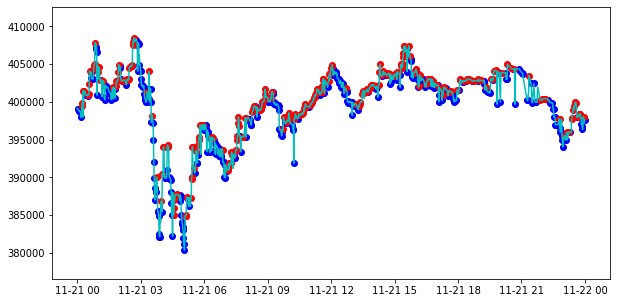

In [29]:
# subplots Î∞è plot ÏÉùÏÑ±
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')

# min_time, local_minÏùÑ ÌôúÏö©Ìïú scatter plot ÏÉùÏÑ±
ax.scatter(mins.min_time, mins.local_min, c='blue')

# maxes_time, local_maxÎ•º ÌôúÏö©Ìïú scatter plot ÏÉùÏÑ±
ax.scatter(maxes.max_time, maxes.local_max, c='red')

# yÏ∂ï ÏÑ§Ï†ï
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

<br>

### Trend Scanning
- [Machine Learning for Asset Managers](https://www.amazon.com/Machine-Learning-Managers-Elements-Quantitative/dp/1108792898)Ïóê ÏÜåÍ∞úÎêú ÎùºÎ≤®ÎßÅ Î∞©Ïãù
- $x_t$(ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞) = Ï£ºÏãù(ÏΩîÏù∏) Í∞ÄÍ≤©
  - ÌòÑÏû¨ ÏãúÏ†ê(t) ~ $t+l$ ÏãúÏ†êÏùò ÌöåÍ∑ÄÏãù ÌïÑÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ ùõΩÎ•º Íµ¨ÌïòÍ∏∞
  - ùõΩÍ∞íÏùò Tvalue Íµ¨ÌïòÍ∏∞
  - `maxTvalue` Î∂ÄÌò∏Î•º ÌÜµÌï¥ ÎùºÎ≤®ÎßÅ

<br>

- Tvalue?
  - Îëê ÎåÄÏÉÅÏùò ÌèâÍ∑†Ï†Å Ï∞®Ïù¥ Ï†ïÎèÑÎ•º ÌëúÌòÑ(Îëê ÎåÄÏÉÅÏùÑ **ÌèâÍ∑†Ï†ÅÏúºÎ°ú** ÎπÑÍµêÌïòÍ≥†Ïûê)
  - t-valueÍ∞Ä ÌÅ¥ÏàòÎ°ù ‚û°Ô∏è Îëê ÎåÄÏÉÅÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïª§Ïßê
  - ex. ÎÇòÏùò Í∞ÄÏÑ§Î°ú Í≥ÑÏÇ∞Ìïú Ï£ºÍ∞Ä vs Ïã§Ï†ú Ï£ºÍ∞ÄÏùò ÌèâÍ∑†Ï†Å Ï∞®Ïù¥
    - Í∞ÄÏÑ§ Í≥ÑÏÇ∞ Ï£ºÍ∞Ä - Ïã§Ï†ú Ï£ºÍ∞Ä ÏÇ¨Ïù¥Ïùò t-valueÍ∞Ä 0ÏóêÏÑú Î©ÄÎã§ ‚û°Ô∏è Îëê Ï£ºÍ∞Ä ÏÇ¨Ïù¥Ïùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§!

- ÏÑ†Ìòï Ï∂îÏÑ∏Ïùò t-value Í∞í Í≥ÑÏÇ∞

In [30]:
def t_val_lin_r(close):
    import statsmodels.api as sml

    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

- Ï°∞Í±¥ ÏÑ§Ï†ï
  - `look_forward_window` : ÌòÑÏû¨ ÏãúÏ†êÏóêÏÑú ÌäπÏ†ï ÎØ∏Îûò ÏãúÏ†êÍπåÏßÄÏùò Í¥ÄÏ∞∞Ìï† ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
  - `min_sample_length` : ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏµúÏÜå Í∏∏Ïù¥
  - `step` : Ïä¨ÎùºÏù¥Îî© ÏúàÎèÑÏö∞ Ïù¥Îèô ÏãúÏùò Í∞ÑÍ≤©
  - `t1_array` : ÌäπÏ†ï Í∏∞Ï§Ä ÏãúÏ†ê Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
  - `t_values_array` : Í∞Å ÏúàÎèÑÏö∞Ïùò t-value Ï†ÄÏû•

In [31]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

- Ïã§Ï†ú t-value Í≥ÑÏÇ∞ ÏßÑÌñâ Î∞è ÏµúÎåÄ t-value ÏÑ†Ï†ï
  - `ÌòÑÏû¨ ÏãúÏ†ê(ind)`Î∂ÄÌÑ∞ `ÎØ∏Îûò look_forward_window`ÍπåÏßÄÏùò ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
  - ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÌÜµÌïú t-valueÎ•º Ïù¥Ïö©Ìïú Ï∂îÏÑ∏ Ï∂îÏ†ï ÏßÑÌñâ

In [32]:
molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # Ï†ÑÎ∞© ÌÉêÏÉâÏùÑ ÏúÑÌïú ÏÉòÌîå Ï∂îÏ∂ú
    if look_forward_window > subset.shape[0]:
        continue

    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ t ÌÜµÍ≥ÑÎüâÍ∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï∂îÏÑ∏ Ï∂îÏ†ï
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))  # t-value ÏÇ¨Ïö©

    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33384/33384 [13:24<00:00, 41.50it/s]


- 2017ÎÖÑ 11Ïõî 21Ïùº Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

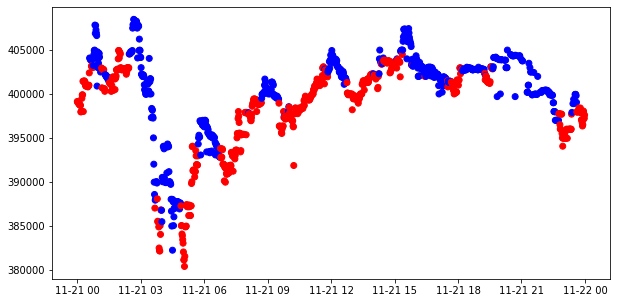

In [33]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

<br>
<br>

## 2Ô∏è‚É£ Feature Engineering


### ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

- ta, shap ÏÑ§Ïπò

In [26]:
!pip install ta==0.9.0

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28893 sha256=f9d651f7f5ec9bec1c5d6fa511d12de6350eff97c26e132f2d562bb9b255ec38
  Stored in directory: /root/.cache/pip/wheels/b7/65/0e/3d1bb888bc1bd2cdfb6d7f025fd9d0b44ca4873e27f8bb369e
Successfully built ta


In [27]:
!pip install shap

- ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [34]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

- Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & 1000Í∞úÎ°ú ÏûêÎ•¥Í∏∞

In [35]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

<br>

### Technical Index

- Í∏∞Ïà†Ï†Å ÏßÄÌëú Ï†ÅÏö©

In [36]:
mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

- ÏàòÏùµÎ•† / Î≥ÄÎèôÏÑ± ÏßÄÌëú Ï†ÅÏö©
  - Î©òÌÖÄ Î∞è ÏàòÏùµÎ•† Í≥ÑÏÇ∞, ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞

In [37]:
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

- ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖã Í∞ÄÍ≥µ Î∞è Î∂ÑÎ¶¨

In [38]:
df_tmp_data = df_.join(df_label_data).dropna()

# X, y Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
X = df_tmp_data.iloc[:, 5:-1]
y = df_tmp_data.iloc[:, -1]

# StandardScaler Ï†ÅÏö©
sc = StandardScaler()

# fit_transform ÏÇ¨Ïö©
X_sc = sc.fit_transform(X)

# DataFrame Î≥ÄÌôò
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

- ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Ï†ÅÏö©

In [39]:
# RandomForest Î™®Îç∏ Ï†ÅÏö©
rfc = RandomForestClassifier(class_weight='balanced')

# RandomForest fit ÌïòÍ∏∞
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

<br>

### Feature Selection methods

#### MDI, Mean Decrease Impurity

In [40]:
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

mean       std
volume_cmf        0.046446  0.002093
volume_fi         0.041477  0.002135
volume_mfi        0.045032  0.002210
volume_sma_em     0.036760  0.001662
volume_vpt        0.026461  0.001450
volatility_atr    0.071882  0.003156
volatility_ui     0.048375  0.002214
trend_macd_diff   0.074075  0.003889
trend_adx         0.056668  0.002183
trend_trix        0.071451  0.003412
trend_mass_index  0.074257  0.003042
trend_dpo         0.022726  0.001474
trend_aroon_ind   0.030375  0.001524
momentum_rsi      0.037284  0.002425
momentum_wr       0.028200  0.001998
vol_change_5      0.016118  0.000969
ret_5             0.032602  0.002326
vol_change_10     0.015963  0.000876
ret_10            0.050149  0.002982
vol_change_20     0.018289  0.000986
ret_20            0.039359  0.002428
std_30            0.049564  0.002464
vol_std_30        0.066488  0.002656

#### MDA, Mean Decrease Accuracy

In [41]:
# 1. svc ÏÇ¨Ïö©, n_splits=5
svc_rbf = SVC(kernel='rbf', probability=True) # Tree Î∞è Support Vector Machine Ïô∏Ïóê Îã§Î•∏ Î∂ÑÎ•òÍ∏∞(classifier)Î•º ÏÇ¨Ïö©Ìï¥Î¥ÖÏãúÎã§.
cv = KFold(n_splits=5)
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [ ]:
# # 2. LogisticRegression ÏÇ¨Ïö©, n_splits=10
# from sklearn.linear_model import LogisticRegression

# log_reg = LogisticRegression(max_iter=1000)
# cv = KFold(n_splits=10)
# feat_imp_mda = imp.mean_decrease_accuracy(log_reg, X_sc, y, cv_gen=cv)

- plot_feature_importance Ìï®Ïàò

In [43]:
# plot_feature_importance Ìï®Ïàò ÎßåÎì§Í∏∞
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path) 
    else:
        plt.show()

- feat_imp Î∞è feat_imp_mda ÌôïÏù∏

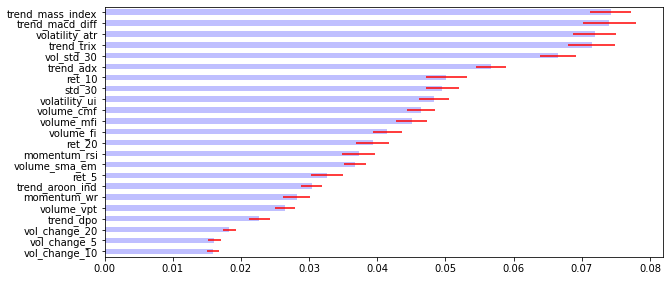

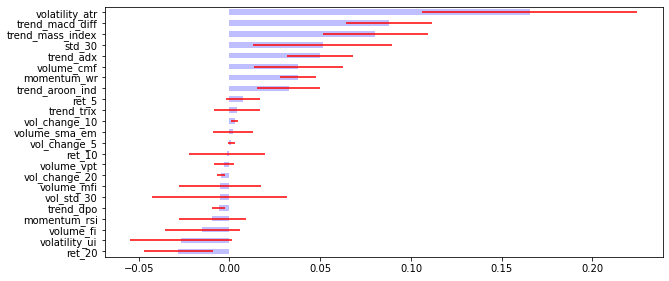

In [44]:
# feat_imp ÌôïÏù∏
plot_feature_importance(feat_imp)

# feat_imp_mda ÌôïÏù∏
plot_feature_importance(feat_imp_mda)

#### RFE CV, Recursive Feature Elimination

In [45]:
svc_rbf = SVC(kernel='linear', probability=True) 
rfe_cv = RFECV(svc_rbf, cv=cv)
rfe_fitted = rfe_cv.fit(X_sc, y)

- ÏÑ†ÌÉùÎêú ÌîºÏ≥ê ÌôïÏù∏

In [46]:
rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df

Optimal_Features Ranking
volume_cmf                  False      12
volume_fi                   False       4
volume_mfi                  False      14
volume_sma_em               False       7
volume_vpt                  False       8
volatility_atr               True       1
volatility_ui               False      11
trend_macd_diff              True       1
trend_adx                   False      19
trend_trix                  False      10
trend_mass_index            False      13
trend_dpo                   False      16
trend_aroon_ind             False       5
momentum_rsi                False       2
momentum_wr                 False       3
vol_change_5                False      20
ret_5                       False      18
vol_change_10               False      21
ret_10                      False      17
vol_change_20               False      15
ret_20                      False       6
std_30                       True       1
vol_std_30                  False       9

- Optimal_FeaturesÍ∞Ä TrueÏù∏ ÌñâÎßå ÌïÑÌÑ∞ÎßÅ

In [47]:
rfe_df[rfe_df["Optimal_Features"]==True]

Optimal_Features Ranking
volatility_atr              True       1
trend_macd_diff             True       1
std_30                      True       1

#### SFS, Sequential Feature Selection

In [48]:
# SFS, Sequential Feature Selection

n = 2
sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

In [49]:
# ÏÑ†ÌÉùÎêú ÌîºÏ≥ê ÌôïÏù∏ÌïòÍ∏∞

sfs_rank = sfs_fitted.get_support()
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns={"Optimal_Features"})

sfs_df[sfs_df["Optimal_Features"]==True].index

Index(['volume_mfi', 'trend_macd_diff'], dtype='object')

#### SHAP, Shapley Additive explanations

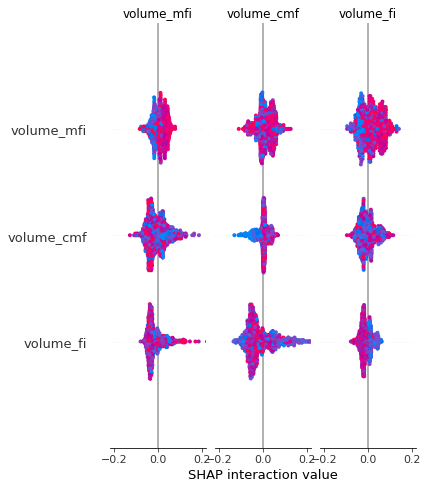

In [50]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc ÏÇ¨Ïö© shap.summary_plot Í∑∏Î¶¨Í∏∞
shap.summary_plot(shap_value, X_sc)

- Í≤∞Í≥º Î≥ÑÎèÑ Ï†ÄÏû•(pkl)

In [ ]:
# output_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
# df_tmp_data.to_pickle(output_file_name)

<br>
<br>

## 3Ô∏è‚É£ Model Training

### ÌôòÍ≤Ω Íµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [51]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.mlutil.pkfold import PKFold

- pickle ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Î∞è Î™®Îç∏ Ï†ÅÏö©ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ ÏÑ§Ï†ï ÏßÑÌñâ

In [53]:
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')

# t-value
# Ï∂îÍ∞Ä
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

df_data['t_value'].value_counts()

# Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÏú®
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# Ïä§ÏºÄÏùºÎßÅ
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# # Í∏∞Ï°¥
# train_x = train_x[:1000]
# train_y = train_y[:1000]

# Î≥ÄÌòï (2000Í∞úÎ°ú ÏÑ§Ï†ï)
train_x = train_x[:2000]
train_y = train_y[:2000]

<br>

### Purged K-fold for Cross-Validation
- n_cvÍ∞Ä 1~5Ï†ïÎèÑÏù∏ ÏàòÏπòÎäî Í≤ÄÏ¶ù ÏÜçÎèÑÎ•º Îπ†Î•¥Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏûëÍ≤å ÏÑ§Ï†ïÌï¥ÏÑú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏúºÎ°ú Ïù¥Ìï¥ ‚û°Ô∏è Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌÅ¨Í≥†, Î™®Îç∏ ÌïôÏäµ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¨Îäî Í≤ΩÏö∞(Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÎÜíÏùÑ Í≤ΩÏö∞) Ïù¥Ï†ïÎèÑ ÏàòÏπòÎ°ú ÌôúÏö©Ìï† Ïàò ÏûàÏßÄ ÏïäÏùÑÍπå?
- n_cvÍ∞Ä 10Ïù¥ ÎÑòÏñ¥Í∞ÄÎäî Í≤ΩÏö∞Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûëÍ±∞ÎÇò Î™®Îç∏ ÌïôÏäµ ÏãúÍ∞ÑÏù¥ ÏßßÏùÄ Í≤ΩÏö∞ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®

<br>

### n_cv = 5Î°ú Ïã§Ìóò!
- 10Ï†ïÎèÑÎ°ú Ïã§ÌóòÌïòÍ≥† Ïã∂ÏßÄÎßå, ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶¨Îäî Î¨∏Ï†úÍ∞Ä ÏûàÏñ¥ÏÑú 5Î°ú Ï°∞Ï†ï..
- LMS ÌôòÍ≤ΩÏùÄ Í∏∞Ï°¥ Í∞íÏù¥ 4Î°ú ÏßÑÌñâÌïòÏó¨ ÎπÑÍµêÌï¥Î≥¥Í∏∞

In [70]:
n_cv = 5
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold
cv = PKFold(n_cv, t1, 0)

<br>

### Model Ï†ÅÏö©

- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏßÑÌñâ
  - ÏòàÏãú ÏΩîÎìúÏóêÏÑú ÏàòÏπò ÏûÑÏùò Ï∂îÍ∞Ä ÏßÑÌñâ
  Ï∞∏Í≥†) LMS ÎÇ¥ ÏΩîÎìú ÏõêÎ≥∏
  ```
  # GridsearchCVÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÌï©ÎãàÎã§. ÌååÎùºÎØ∏ÌÑ∞Í∞íÏùÑ Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
    bc_params = {'n_estimators': [5, 10, 20],
                 'max_features': [0.5, 0.7],
                 'base_estimator__max_depth': [3,5,10,20],
                 'base_estimator__max_features': [None, 'auto'],
                 'base_estimator__min_samples_leaf': [3, 5, 10],
                 'bootstrap_features': [False, True]
                }
  ```

<br>

#### ÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï∂îÍ∞Ä

In [71]:
# GridsearchCVÏóê ÎÑ£ÏùÑ ÌååÎùºÎØ∏ÌÑ∞ Í∞í ÏÑ†Ï†ï
bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.3, 0.5, 0.7, 0.9],
             'base_estimator__max_depth': [3, 5, 10, 20],
             'base_estimator__max_features': [None, 'auto'],
             'base_estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

- RF ÏÇ¨Ïö©

In [72]:
rfc = RandomForestClassifier(class_weight='balanced')

- Bagging Ï†ÅÏö©

In [73]:
bag_rfc = BaggingClassifier(rfc)

- GridSearchCV Ï†ÅÏö©

In [74]:
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

- fit & best estimator(üö® ÏÉÅÎãπ ÏãúÍ∞Ñ ÏÜåÏöîÎê®!!)

In [76]:
gs_rfc.fit(train_x, train_y)

# best estimator
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=3,
                                                        max_features=None,
                                                        min_samples_leaf=5),
                  max_features=0.5, n_estimators=5)

> ### Ï∞∏Í≥†) Í∏∞Ï°¥ ÏòàÏãúÏôÄ Îã§Î•∏ Î∂ÄÎ∂Ñ
> - n_cv = 4 -> 5
> - Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå 1000 -> 2000
> - ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï∂îÍ∞Ä

- ÏòàÏ∏°Í∞í ÌôïÏù∏ÌïòÍ∏∞

In [77]:
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

- ÏÑ±Îä• ÏßÄÌëú Ï†ÅÏö© Î∞è Í≤∞Í≥º ÌôïÏù∏

In [78]:
# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

================= confusion matrix ====================
[[86060 35252]
 [29757 30700]]
Ï†ïÌôïÎèÑ:0.642353756691185, Ï†ïÎ∞ÄÎèÑ:0.46549005337214944, Ïû¨ÌòÑÏú®:0.5077989314719553


- ROC Curve ÏãúÍ∞ÅÌôî

auc:0.6086046886323111


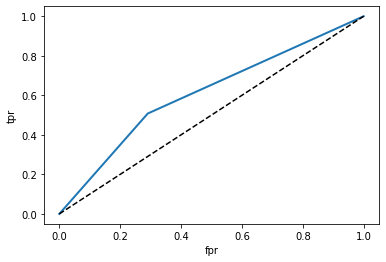

In [79]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

<br>

## LMS ÌôòÍ≤Ω(Í∏∞Ï°¥ ÏΩîÎìú)ÏôÄ Í≤∞Í≥º ÎπÑÍµê

- LMSÏóêÏÑúÏùò Í≤∞Í≥º
  - n_cv = 4
  - Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå 1000
  - ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í∞í Ïú†ÏßÄ

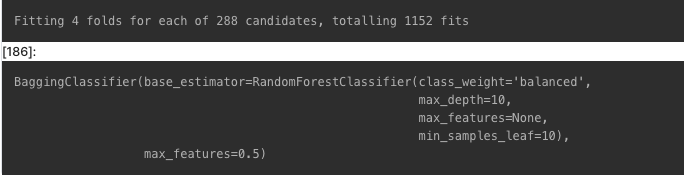
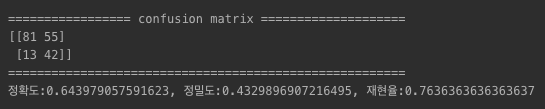
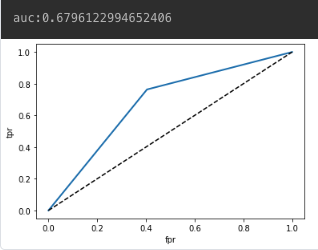

- ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÏùò Í≤∞Í≥º
  - n_cv = 5
  - Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå 2000
  - ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï∂îÍ∞Ä

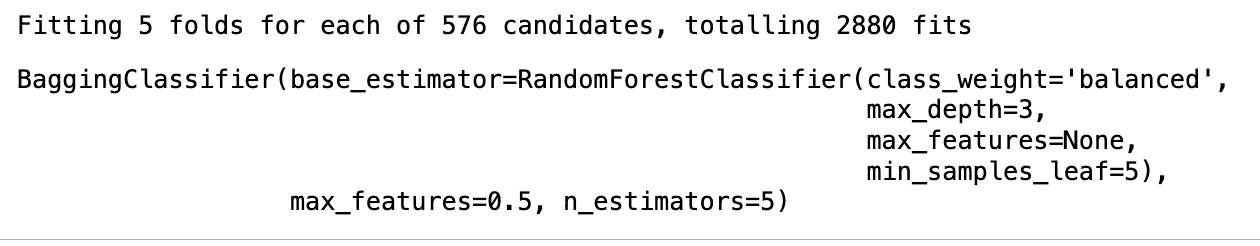
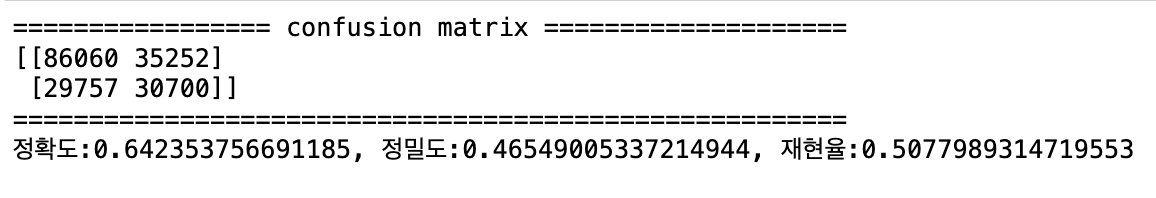
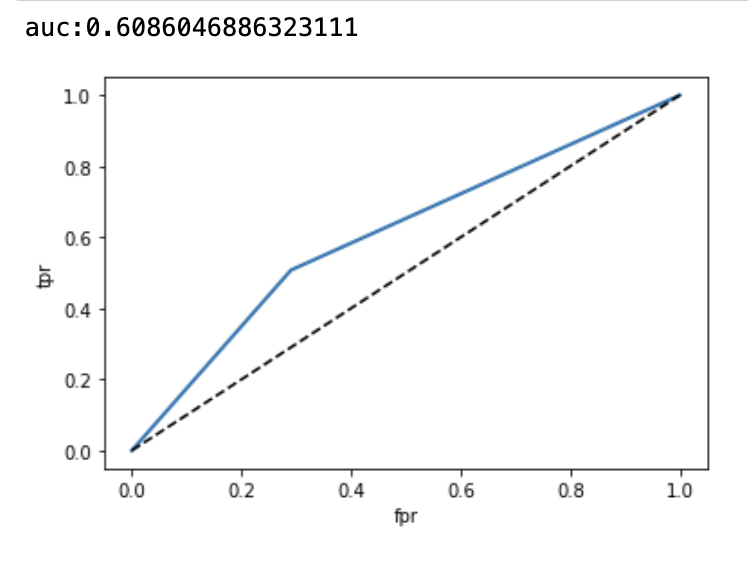

# Í≤∞Í≥º Î∂ÑÏÑù
- Ï†ïÎ∞ÄÎèÑ Ï†úÏô∏ Î™®Îëê ÏÑ±Îä•Ïù¥ Í∞êÏÜåÌïòÏòÄÏùå
  - ÏõêÏù∏ : random_stateÎ•º ÏÑ§Ï†ïÌïòÏßÄ ÏïäÏùÄ Í≤ÉÏù¥ Í∞ÄÏû• ÌÅ∞ ÏõêÏù∏ÏúºÎ°ú Î≥¥ÏûÑ(Îß§Î≤à ÎûúÎç§ÏÑ±Ïù¥ Ïã¨Ìï¥Ï†∏ÏÑú ÏÑ±Îä• ÎπÑÍµêÏóê Î∂ÄÏ†ÅÏ†à)
  - ÏÉòÌîå Í∞úÏàòÎ•º ÎäòÎ¶∞ Í≤ÉÏù¥ -> Í≥ºÏ†ÅÌï©Ïùò ÏõêÏù∏Ïù¥ ÎêòÏóàÏùÑ Ïàò ÏûàÏùå
- ROC Ïª§Î∏åÎ•º Î≥¥ÏïÑÎèÑ, fprÏùò Í≥†Ï†êÏù¥ ÏïûÏúºÎ°ú ÎãπÍ≤®Ï†∏ ÏûàÎäîÎç∞ Ïù¥Îäî Î™®Îç∏Ïù¥ Îçî ÎßéÏùÄ ÏûòÎ™ªÎêú ÏñëÏÑ± ÏòàÏ∏°ÏùÑ ÌïòÍ≥† ÏûàÎã§Îäî ÎßêÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÑ±Îä•Ïù¥ ÎÇÆÍ≤å ÎÇòÏò® Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ

<br>

# Ï∂îÍ∞Ä ÏãúÎèÑ 
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≥ÄÍ≤Ω : GridSearchCV -> Optuna
- ÌïôÏäµ Î™®Îç∏ Î≥ÄÍ≤Ω
  - Logistic Regression
  - LightGBM
  - CatBoost
  - Naive Bayes

<br>
<br>

# Ï∂îÍ∞Ä: ÌäúÎãù Î∞©Ïãù Î∞îÍøîÎ≥¥Í∏∞_Optuna

- Optuna Ï†ÅÏö©
  - Í∏∞Ï°¥Ïùò GridSearchCVÎ≥¥Îã§ ÏãúÍ∞ÑÏ†Å Ìö®Ïú®Ïù¥ ÏûàÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

In [81]:
!pip install optuna

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 364 kB 4.3 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1 MB 64.5 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 233 kB 112.6 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 78 kB 12.6 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 597 kB 69.6 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

In [84]:
import optuna

def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    max_features = trial.suggest_float('max_features', 0.3, 0.9)
    max_depth = trial.suggest_int('base_estimator__max_depth', 3, 20)
    min_samples_leaf = trial.suggest_int('base_estimator__min_samples_leaf', 3, 20)
    bootstrap_features = trial.suggest_categorical('bootstrap_features', [False, True])
    
    rfc = RandomForestClassifier(
        class_weight='balanced',
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_features=None
    )
    bag_rfc = BaggingClassifier(
        base_estimator=rfc,
        n_estimators=n_estimators,
        max_features=max_features,
        bootstrap_features=bootstrap_features
    )
    
    # cross validation
    scores = []
    for train_idx, val_idx in cv.split(train_x):
        X_train, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]
        
        bag_rfc.fit(X_train, y_train)
        preds = bag_rfc.predict(X_val)
        scores.append(accuracy_score(y_val, preds))
    
    return np.mean(scores)

# Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÎΩëÍ∏∞
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2024-12-13 11:23:13,875] A new study created in memory with name: no-name-28816d89-15ac-4a14-903d-1a4969d7df82
[I 2024-12-13 11:27:21,051] Trial 0 finished with value: 0.6445000000000001 and parameters: {'n_estimators': 100, 'max_features': 0.596510818544905, 'base_estimator__max_depth': 11, 'base_estimator__min_samples_leaf': 13, 'bootstrap_features': True}. Best is trial 0 with value: 0.6445000000000001.
[I 2024-12-13 11:28:24,276] Trial 1 finished with value: 0.6499999999999999 and parameters: {'n_estimators': 31, 'max_features': 0.616891649593913, 'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 11, 'bootstrap_features': True}. Best is trial 1 with value: 0.6499999999999999.
[I 2024-12-13 11:30:41,983] Trial 2 finished with value: 0.643 and parameters: {'n_estimators': 44, 'max_features': 0.7681262881421427, 'base_estimator__max_depth': 20, 'base_estimator__min_samples_leaf': 12, 'bootstrap_features': True}. Best is trial 1 with value: 0.6499999999999999.
[I 2

Best Parameters: {'n_estimators': 62, 'max_features': 0.8285727979016057, 'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 3, 'bootstrap_features': False}


- ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÏÉùÏÑ±

In [85]:
rfc = RandomForestClassifier(
    class_weight='balanced',
    max_depth=best_params['base_estimator__max_depth'],
    min_samples_leaf=best_params['base_estimator__min_samples_leaf'],
    max_features=None
)
bag_rfc = BaggingClassifier(
    base_estimator=rfc,
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    bootstrap_features=best_params['bootstrap_features']
)

- Î™®Îç∏ ÌïôÏäµ & ÏòàÏ∏°

In [86]:
bag_rfc.fit(train_x, train_y)
pred_y = bag_rfc.predict(test_x)
prob_y = bag_rfc.predict_proba(test_x)

- ÏÑ±Îä• ÏßÄÌëú Ï∂úÎ†•

In [87]:
confusion = confusion_matrix(test_y, pred_y)
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)

# Í≤∞Í≥º Ï∂úÎ†•
print('================= Confusion Matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ: {accuracy}, Ï†ïÎ∞ÄÎèÑ: {precision}, Ïû¨ÌòÑÏú®: {recall}')

================= Confusion Matrix ====================
[[119569   1743]
 [ 57574   2883]]
Ï†ïÌôïÎèÑ: 0.6736682272554726, Ï†ïÎ∞ÄÎèÑ: 0.6232166018158236, Ïû¨ÌòÑÏú®: 0.04768678564930447


- Í≤∞Í≥º ÏãúÍ∞ÅÌôî

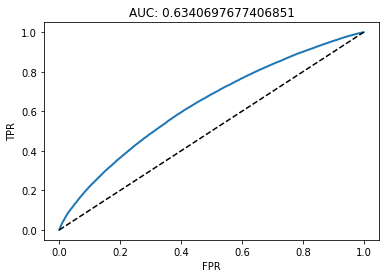

In [88]:
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])
auc = roc_auc_score(test_y, prob_y[:, 1])

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'AUC: {auc}')
plt.show()

### Optuna ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Í≤∞Í≥º Î∂ÑÏÑù
- ÏïÑÎûò 2Í∞ÄÏßÄÍ∞Ä ÎèôÏùºÌïú ÏÉÅÌÉúÏóêÏÑú ÌäúÎãù ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î≥ÄÍ≤ΩÌïòÏó¨ ÏàòÌñâ
  - n_cv = 5
  - Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå 2000

<br>

- Ïù¥Ï†Ñ
  - Ï†ïÌôïÎèÑ:0.642353756691185, Ï†ïÎ∞ÄÎèÑ:0.46549005337214944, Ïû¨ÌòÑÏú®:0.5077989314719553
- Ïù¥ÌõÑ
  - Ï†ïÌôïÎèÑ: 0.6736682272554726, Ï†ïÎ∞ÄÎèÑ: 0.6232166018158236, Ïû¨ÌòÑÏú®: 0.04768678564930447
- Ï†ïÌôïÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌñàÏùÑ Í≤ΩÏö∞ ÏïΩ 0.64ÏóêÏÑú 0.67Î°ú Ï¶ùÍ∞ÄÌñàÏùåÏùÑ Î≥º Ïàò ÏûàÏùå 
  - Í∑∏Îü¨ÎÇò, Ïû¨ÌòÑÏú® ÏàòÏπòÍ∞Ä ÌÅ¨Í≤å Í∞êÏÜåÌïú Í≤ÉÏùÄ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Îì±Ïùò Ïù¥Ïú†Î•º Ï∞æÏïÑÎ≥¥ÏïÑÏïº ÌïòÎäî Î¨∏Ï†úÎäî Ïó¨Ï†ÑÌûà Ï°¥Ïû¨Ìï®

### Logistic Regression Ï†ÅÏö©Ìï¥Î≥¥Í∏∞
- ÏÉÅÏäπ : 1, ÌïòÎùΩ : 0ÏúºÎ°ú ÎùºÎ≤®ÎßÅÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÅÏö©Ìï¥Î≥º Í≤É

================= confusion matrix ====================
[[113012   8300]
 [ 50972   9485]]
Ï†ïÌôïÎèÑ: 0.6739157942223372, Ï†ïÎ∞ÄÎèÑ: 0.5333145909474276, Ïû¨ÌòÑÏú®: 0.1568883669384852


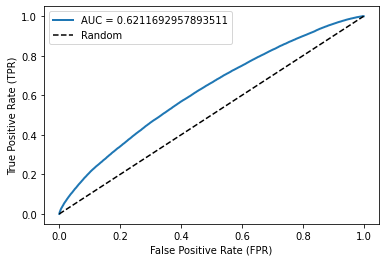

AUC: 0.6211692957893511


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression Î™®Îç∏ ÌõàÎ†®
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(train_x, train_y)

# ÏòàÏ∏° Î∞è ÌôïÎ•†
pred_y = model.predict(test_x)
prob_y = model.predict_proba(test_x)

# ÏßÄÌëú Í≥ÑÏÇ∞
confusion = confusion_matrix(test_y, pred_y)
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)

# Í≤∞Í≥º Ï∂úÎ†•
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ: {accuracy}, Ï†ïÎ∞ÄÎèÑ: {precision}, Ïû¨ÌòÑÏú®: {recall}')

# ROC Curve Î∞è AUC
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC Curve Í∑∏Î¶¨Í∏∞
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

print(f'AUC: {auc}')

### LightGBM Ï†ÅÏö©Ìï¥Î≥¥Í∏∞

================= confusion matrix ====================
[[116106   5206]
 [ 56769   3688]]
Ï†ïÌôïÎèÑ: 0.6590452717460072, Ï†ïÎ∞ÄÎèÑ: 0.41466156959748146, Ïû¨ÌòÑÏú®: 0.06100203450386225


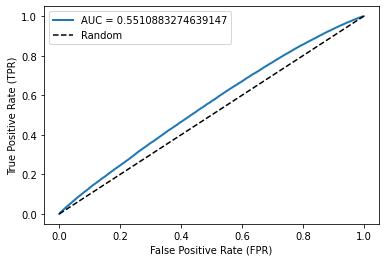

AUC: 0.5510883274639147


In [90]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# LightGBM Î™®Îç∏ ÌõàÎ†®
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(train_x, train_y)

# ÏòàÏ∏° Î∞è ÌôïÎ•†
pred_y = model.predict(test_x)
prob_y = model.predict_proba(test_x)

# ÏßÄÌëú Í≥ÑÏÇ∞
confusion = confusion_matrix(test_y, pred_y)
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)

# Í≤∞Í≥º Ï∂úÎ†•
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ: {accuracy}, Ï†ïÎ∞ÄÎèÑ: {precision}, Ïû¨ÌòÑÏú®: {recall}')

# ROC Curve Î∞è AUC
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC Curve Í∑∏Î¶¨Í∏∞
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

print(f'AUC: {auc}')

### CatBoost Ï†ÅÏö©Ìï¥Î≥¥Í∏∞
- Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïóê Ïú†Î¶¨ÌïòÎã§Î≥¥Îãà Ïù¥ Î™®Îç∏Ïù¥ Î∂ÄÏ†ÅÌï©ÌïòÎã§Í≥† ÏÉùÍ∞ÅÌñàÏúºÎÇò CatBoostÎ•º Ïù¥Ïö©Ìïú Ìà¨Ïûê ÏïåÍ≥†Î¶¨Ï¶ò Í≤ΩÏßÑÎåÄÌöåÍ∞Ä ÏûàÎäî Í≤ÉÏùÑ Î∞úÍ≤¨ÌïòÏó¨ Ïã§ÌóòÏ†ÅÏúºÎ°ú Ï∂îÍ∞Ä

In [92]:
!pip install catboost

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 98.7 MB 68 kB/s              
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.1 MB 75.8 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47 kB 7.1 MB/s             


================= confusion matrix ====================
[[105578  15734]
 [ 49268  11189]]
Ï†ïÌôïÎèÑ: 0.6423922671082528, Ï†ïÎ∞ÄÎèÑ: 0.4155926159789028, Ïû¨ÌòÑÏú®: 0.18507368873744975


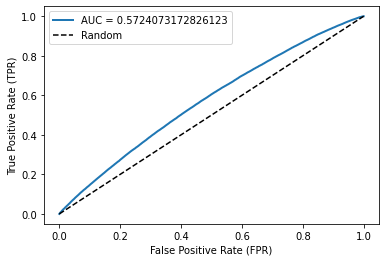

AUC: 0.5724073172826123


In [93]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# CatBoost Î™®Îç∏ ÌõàÎ†®
model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
model.fit(train_x, train_y)

# ÏòàÏ∏° Î∞è ÌôïÎ•†
pred_y = model.predict(test_x)
prob_y = model.predict_proba(test_x)

# ÏßÄÌëú Í≥ÑÏÇ∞
confusion = confusion_matrix(test_y, pred_y)
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)

# Í≤∞Í≥º Ï∂úÎ†•
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ: {accuracy}, Ï†ïÎ∞ÄÎèÑ: {precision}, Ïû¨ÌòÑÏú®: {recall}')

# ROC Curve Î∞è AUC
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC Curve Í∑∏Î¶¨Í∏∞
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

print(f'AUC: {auc}')

### Naive Bayes Ï†ÅÏö©Ìï¥Î≥¥Í∏∞

================= confusion matrix ====================
[[92070 29242]
 [32863 27594]]
Ï†ïÌôïÎèÑ: 0.6583300782861764, Ï†ïÎ∞ÄÎèÑ: 0.4855021465268492, Ïû¨ÌòÑÏú®: 0.4564235737797112


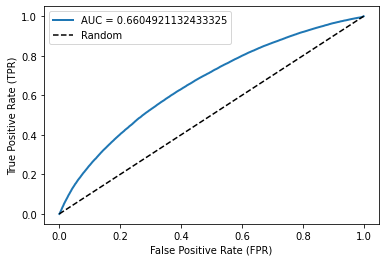

AUC: 0.6604921132433325


In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Naive Bayes Î™®Îç∏ ÌõàÎ†®
model = GaussianNB()
model.fit(train_x, train_y)

# ÏòàÏ∏° Î∞è ÌôïÎ•†
pred_y = model.predict(test_x)
prob_y = model.predict_proba(test_x)

# ÏßÄÌëú Í≥ÑÏÇ∞
confusion = confusion_matrix(test_y, pred_y)
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)

# Í≤∞Í≥º Ï∂úÎ†•
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ: {accuracy}, Ï†ïÎ∞ÄÎèÑ: {precision}, Ïû¨ÌòÑÏú®: {recall}')

# ROC Curve Î∞è AUC
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:, 1])  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC Curve Í∑∏Î¶¨Í∏∞
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

print(f'AUC: {auc}')

### ÏÉàÎ°úÏö¥ Î™®Îç∏Îì§Ïùò Í≤∞Í≥º Î∂ÑÏÑù
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù(Optuna)ÍπåÏßÄ ÌñàÎçò ÏàòÏπò
  - Ï†ïÌôïÎèÑ: 0.6736682272554726, Ï†ïÎ∞ÄÎèÑ: 0.6232166018158236, Ïû¨ÌòÑÏú®: 0.04768678564930447
- Logistic Regression
  - Ï†ïÌôïÎèÑ: 0.6739157942223372, Ï†ïÎ∞ÄÎèÑ: 0.5333145909474276, Ïû¨ÌòÑÏú®: 0.1568883669384852
- LightGBM
  - Ï†ïÌôïÎèÑ: 0.6590452717460072, Ï†ïÎ∞ÄÎèÑ: 0.41466156959748146, Ïû¨ÌòÑÏú®: 0.06100203450386225
- CatBoost
  - Ï†ïÌôïÎèÑ: 0.6423922671082528, Ï†ïÎ∞ÄÎèÑ: 0.4155926159789028, Ïû¨ÌòÑÏú®: 0.18507368873744975
- Naive Bayes
  - Ï†ïÌôïÎèÑ: 0.6583300782861764, Ï†ïÎ∞ÄÎèÑ: 0.4855021465268492, Ïû¨ÌòÑÏú®: 0.4564235737797112

<br>

- ÏòàÏÉÅÌïúÎßåÌÅº, Logistic RegressionÏùò Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÍ≤å Ï∏°Ï†ïÎê®, Ïû¨ÌòÑÏú® Ïó≠Ïãú Í∏∞Ï°¥ ÌäúÎãù ÏàòÏπòÏóê ÎπÑÌïòÎ©¥ Í∞úÏÑ†Îê®
- Naive Bayes Ïó≠Ïãú ÎÇòÏÅòÏßÄ ÏïäÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥Ïù¥Î©¥ÏÑúÎèÑ Ïû¨ÌòÑÏú®Ïù¥ Ïûò Î≥¥Ï°¥Îêú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÏùå

<br>
<br>

# ÌöåÍ≥†
Ïò§ÎäòÏùÄ Finance Time Series Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎäî ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌñàÏäµÎãàÎã§.
<br>
Data Labeling Í≥ºÏ†ïÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ï 4Í∞ÄÏßÄÏù∏ Price Change Direction, Using Moving Average, Local Min-Max, Trend ScanningÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏÇ¨Ï†Ñ ÎùºÎ≤®ÎßÅÏùÑ ÏßÑÌóπÌïòÎäî Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Í∞ÅÍ∞ÅÏùò ÎùºÎ≤®ÎßÅÏùò Ï∞®Ïù¥Ï†êÏóê ÏßëÏ§ëÌï¥ÏÑú ÏΩîÎìúÎ•º ÏÇ¥Ìé¥Î¥§Îçò Í≤É Í∞ôÏïÑÏöî.
<br>
<br>
Í∑∏ Îã§Ïùå Feature EngineeringÏùÑ ÌÜµÌï¥ Technical IndexÏùò Í∏∞Ïà†Ï†Å ÏßÄÌëúÏôÄ ÏàòÏùµÎ•†/Î≥ÄÎèôÏÑ± ÏßÄÌëúÎ•º Ï†ÅÏö©ÌñàÎäîÎç∞, ÏïÑÎ¨¥ÎûòÎèÑ Í∞úÎÖêÏ†ÅÏù∏ Ï∏°Î©¥Ïù¥ÎÇò ÏΩîÎìúÏ†ÅÏù∏ Ï∏°Î©¥ Î™®ÎëêÍ∞Ä Í∞ÄÏû• Ïñ¥Î†µÍ≤å ÎäêÍª¥Ï°åÎçò Îã®Í≥ÑÏòÄÎçò Í≤É Í∞ôÏäµÎãàÎã§.
<br>
Í≥µÏãù Î¨∏ÏÑúÏóê ÏΩîÎìúÍ∞Ä Ï†úÍ≥µÎêòÏñ¥ ÏûàÎäî ÌòïÌÉúÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÅÍ∞ÅÏùò ÏßÄÌëúÎ≥ÑÎ°ú ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÎäî Î∞©Î≤ï ÏûêÏ≤¥ÏóêÎßå Îçî Ïã†Í≤ΩÏùÑ Ïì∞Î©¥ÏÑú Ïö∞ÏÑ† ÎÑòÏñ¥Í∞îÏóàÎäîÎç∞, Ïù¥ÌõÑÏóê Í∏àÏúµ ÏãúÍ≥ÑÏó¥Í≥º Í¥ÄÎ†®Îêú ÎÇ¥Ïö©ÏùÑ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Îçî ÏßÑÌñâÏùÑ ÌïòÍ≤å ÎêúÎã§Î©¥ Ïù¥ Î∂ÄÎ∂ÑÏóê ÎåÄÌïú Í∞úÎÖêÏ†ÅÏù∏ Ïù¥Ìï¥Î•º Îçî Î∂ÑÎ™ÖÌïòÍ≤å Ìï¥ÏïºÍ≤†Îã§Îäî Îã§ÏßêÏùÑ ÌñàÏñ¥Ïöî..!
<br>
Feature Selection methodsÏù∏ MDIÏôÄ MDAÎ•º Ï†ÅÏö©Ìï¥ feature_importance Ìï®ÏàòÎ•º ÎßåÎì§Í≥†, RFE, SFS, SHAPÍπåÏßÄÎèÑ Ï†ÅÏö©Ìï¥Î≥¥Î©¥ÏÑú ÌîºÏ≥êÍ∞Ä Ïñ¥ÎñªÍ≤å ÏÑ†ÌÉùÎêòÎäîÏßÄ ÌïòÎÇòÌïòÎÇò ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏóàÏäµÎãàÎã§.
<br>
<br>
Í∑∏Î¶¨Í≥† ÎßàÏßÄÎßâÏúºÎ°ú Model Training Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ PKFoldÎ•º Ï†ÅÏö©ÌïòÍ≥† RandomForest Î™®Îç∏Ïóê ÌïôÏäµÌïòÏó¨ Í∑∏ Í≤∞Í≥ºÎ•º ÎΩëÏïÑÎÇ¥Îäî Îã®Í≥ÑÎ•º ÏßÑÌñâÌñàÏäµÎãàÎã§.
<br>
Ïù¥ Í≥ºÏ†ïÏóêÏÑú Îòê Îã§Ïãú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏßÄÏò•Ïóê Ïû†Ïãú Îì§Ïñ¥Í∞îÎã§ ÏôîÏñ¥Ïöîü•∫
<br>
Î¨¥Ìïú Í∏∞Îã§Î¶ºÏùò ÏãúÏûëÏù¥ÏóàÏäµÎãàÎã§..
<br>
ÌäπÌûà, Îçî Ïò§Îûò Í±∏Î†∏Îçò Ïù¥Ïú†Îäî Î™®Îç∏Ïóê Ï†ÅÌï©ÌïòÎäî Îã®Í≥ÑÏóêÏÑúÏùò Ïò§Î•òÎì§ÏùÑ Î∞úÍ≤¨ÌñàÎçò Í≤ÉÏûÖÎãàÎã§.
<br>
Í∞úÏù∏Ï†ÅÏù∏ Ïã§ÏàòÏóê Îçî Í∞ÄÍπùÍ∏¥ ÌïòÏßÄÎßå, ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î•º ÎÑ£Í∏∞ ÏúÑÌïú ÏΩîÎìúÏòÄÎçò `gs_rfc_best = gs_rfc.best_estimator_` Î∂ÄÎ∂ÑÏóêÏÑú Ïã§ÏàòÎ°ú ÎßàÏßÄÎßâ _ÏùÑ ÎÑ£ÏßÄ ÏïäÍ≥† Ï†ÅÌï©ÏùÑ ÎèåÎ†§ÏÑú 1ÏãúÍ∞ÑÏùÑ Í∏∞Îã§Î†§ Auttribute ErrorÎ•º Î≥¥Í≤å ÎêòÏóàÏäµÎãàÎã§.
<br>
Ïù¥ Ïã§ÏàòÎ•º ÌÜµÌï¥ÏÑú Î¨¥ÏûëÏ†ï ÏΩîÎìúÎ•º ÎèåÎ¶¨Í∏∞ Ï†ÑÏóê, Î¨∏Ï†úÍ∞Ä ÏóÜÎäîÏßÄ Î∞òÎìúÏãú Ï≤¥ÌÅ¨ÌïòÍ≥† Ïã§ÌñâÌï¥ÏïºÍ≤†Îã§Îäî Îã§ÏßêÏóê Îã§ÏßêÏùÑ ÌñàÏñ¥Ïöî!!
<br>
<br>
Í∑∏Î¶¨Í≥†, Îòê 1Í∞ÄÏßÄÏòÄÎçò `random_state` ÎØ∏Í≥†Ï†ï Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. RFÏùò Í≤ΩÏö∞ ÎûúÎç§ÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î™®Îç∏Ïù∏Îç∞ Í≥†Ï†ïÏùÑ ÌïòÏßÄ ÏïäÏïÑÏÑú ÌäúÎãùÏùÑ Îçî ÌñàÏùåÏóêÎèÑ Í≤∞Íµ≠ ÏÑ±Îä•ÏùÑ ÎûúÎç§Ïóê ÏùòÌï¥ÏÑú Îçî Ï†ÅÍ≤å ÎÇòÏò® Í≤É Í∞ôÎã§ÎùºÍ≥†ÎèÑ ÏùºÎ∂Ä Ï∂îÏ∏°Ìï¥Î≥¥Í≥† ÏûàÏñ¥Ïöî.
<br>
ÎòêÌïú Í∑∏ ÏõêÏù∏Ïù¥ ÏïÑÎãàÎùºÎ©¥, ÏÉòÌîå Í∞úÏàòÍ∞Ä ÎäòÏñ¥ÎÇú Ï†êÍ≥º ROC Ïª§Î∏åÏóêÏÑúÏùò fpr Í≥†Ï†êÏù¥ ÎãπÍ≤®ÏßÑ Ï†êÏúºÎ°ú ÎØ∏Î£®Ïñ¥Î≥¥ÏïÑ Î™®Îç∏Ïù¥ Îçî ÎßéÏùÄ ÏûòÎ™ªÎêú ÏñëÏÑ± ÏòàÏ∏°ÏùÑ ÌïòÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±ÎèÑ ÏóºÎëêÏóê ÎëêÏóàÏäµÎãàÎã§.
<br>
<br>
Ïù¥ Î¨∏Ï†úÏ†êÏùÑ Ïñ¥ÎäêÏ†ïÎèÑ Ìï¥Í≤∞Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ "ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Î≥ÄÍ≤Ω"Í≥º "Î™®Îç∏ Î≥ÄÍ≤Ω" 2Í∞ÄÏßÄ Î∞©ÏãùÏùÑ Î™®Îëê ÏßÑÌñâÌï¥Î¥§Ïñ¥Ïöî.
<br>
ÏïÑÏ£º ÌÅ¨Í≤å Ïú†ÏùòÎßàÌïú ÏÉÅÏäπÌè≠ÏùÑ Î≥¥Ïù¥ÏßÄÎäî Î™ªÌñàÏßÄÎßå, Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±Ïóê Îî∞ÎùºÏÑú Îã§Î•¥Í≤å Ï∏°Ï†ïÎê† Ïàò ÏûàÎäî Î™®Îç∏Îì§ÏùÑ ÏµúÎåÄÌïú Îã§ÏñëÌïòÍ≤å Ï†ÅÏö©Ìï¥Î≥¥Îäî Ïó∞ÏäµÏùÑ ÌñàÏäµÎãàÎã§.
<br>
Í∞ÄÏû• Î¨∏Ï†úÎäî Ïù¥ ÎèÑÎ©îÏù∏Ïóê ÎåÄÌï¥ÏÑú ÎßéÏùÄ ÎÇ¥Ïö©Îì§ÏùÑ ÏïåÍ≥† ÏûàÎã§Í≥† ÏÉùÍ∞ÅÌñàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÎßâÏÉÅ Î∞∞ÏõåÎ≥¥Îãà Î™®Î•¥Îäî Í≤É Ìà¨ÏÑ±Ïù¥ÏòÄÎçò Í≤ÉÏù¥ÏóàÍ≤†Ï£†..?
<br>
Î≥µÏäµÎèÑ Ïó¥Ïã¨ÌûàÌïòÍ≥† Îã§Î•∏ ÏãúÎèÑÎì§ÎèÑ Îçî ÎßéÏù¥ Ìï¥Î≥¥Î©¥ÏÑú Ïñ∏Ï††Í∞ÄÎäî ÏÑ±Îä•ÏùÑ ÌÅ¨Í≤å Ïò¨Î†§Î¥§ÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥Ïöî.
<br>
Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÏïÑÏâ¨Ïö¥ Î∂ÄÎ∂ÑÏù¥ ÎßéÏùÄ ÌÄòÏä§Ìä∏Ïó¨ÏÑú Í≥ÑÏÜç Î≥µÏäµÌï† Í≤É Í∞ôÏäµÎãàÎã§..!
